### Setting up ESRGAN

In [1]:
# !rm -rf BasicSR
!git clone https://github.com/xinntao/BasicSR.git

Cloning into 'BasicSR'...
remote: Enumerating objects: 4837, done.
remote: Counting objects: 100% (598/598), done.
remote: Compressing objects: 100% (352/352), done.
remote: Total 4837 (delta 301), reused 446 (delta 225), pack-reused 4239
Receiving objects: 100% (4837/4837), 2.73 MiB | 11.01 MiB/s, done.
Resolving deltas: 100% (2868/2868), done.


In [6]:
%cd BasicSR 
# Install pytorch
!pip install torch torchvision

# Check torch and cuda versions
import torch
print('Torch Version: ', torch.__version__)
print('CUDA Version: ', torch.version.cuda)
print('CUDNN Version: ', torch.backends.cudnn.version())
print('CUDA Available:', torch.cuda.is_available())

/mnt/disks/user/project/BasicSR
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/ubuntu/.local/include/python3.8/UNKNOWN
sysconfig: /home/ubuntu/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Torch Version:  1.9.0+cu102
CUDA Version:  10.2
CUDNN Version:  7605
CUDA Available: True


In [2]:
# Install requirements
!pip install -r requirements.txt
# Install BasicSR without cuda extentions 
!python setup.py develop --user


distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 829 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 82.4 MB/s eta 0:00:01
     |████████████████████████████████| 49.9 MB 38 kB/s s eta 0:00:01
     |████████████████████████████████| 30.2 MB 50 kB/s s eta 0:00:01
     |████████████████████████████████| 28.4 MB 36 kB/s s eta 0:00:01
     |████████████████████████████████| 5.7 MB 72.4 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 70 kB/s s eta 0:00:01
     |███████████████████████████

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

Searching for setuptools==56.0.0
Best match: setuptools 56.0.0
Adding setuptools 56.0.0 to easy-install.pth file

Using /usr/local/lib/python3.8/dist-packages
Searching for google-auth-oauthlib==0.4.5
Best match: google-auth-oauthlib 0.4.5
Adding google-auth-oauthlib 0.4.5 to easy-install.pth file
Installing google-oauthlib-tool script to /home/ubuntu/.local/bin

Using /home/ubuntu/.local/lib/python3.8/site-packages
Searching for grpcio==1.39.0
Best match: grpcio 1.39.0
Adding grpcio 1.39.0 to easy-install.pth file

Using /home/ubuntu/.local/lib/python3.8/site-packages
Searching for Werkzeug==0.16.1
Best match: Werkzeug 0.16.1
Adding Werkzeug 0.16.1 to easy-install.pth file

Using /usr/lib/python3/dist-packages
Searching for google-auth==1.32.0
Best match: google-auth 1.32.0
Adding google-auth 1.32.0 to easy-install.pth file

Using /usr/local/lib/python3.8/dist-packages
Searching for networkx==2.6.2
Best match: networkx 2.6.2
Adding networkx 2.6.2 to easy-install.pth file

Using /home/

In [3]:
!rm -rf experiments/pretrained_models/ESRGAN
!python scripts/download_pretrained_models.py ESRGAN

Download 63.8 MB / 63.8 MB: 100%|██████| 2043/2043 [00:00<00:00, 5553.37chunk/s]


In [4]:
# !python scripts/data_preparation/download_datasets.py Set14
import cv2
import glob
import numpy as np
import os
import torch

from basicsr.archs.rrdbnet_arch import RRDBNet

# configuration
model_path = 'experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth'
folder =  '../gt_images'
device = 'cuda'
folder2 = "../sr_images/esrgan"
processedImages = os.listdir(folder2)
device = torch.device(device)

# set up model
model = RRDBNet(
    num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32)
model.load_state_dict(torch.load(model_path)['params'], strict=True)
model.eval()
model = model.to(device)

os.makedirs('../sr_images/esrgan', exist_ok=True)
for idx, path in enumerate(sorted(glob.glob(os.path.join(folder, '*')))):
    
    try:
        imgname = os.path.splitext(os.path.basename(path))[0]
        if imgname+(".png") in processedImages: continue
        print(idx, imgname)
        # read image
        img = cv2.imread(path, cv2.IMREAD_COLOR).astype(np.float32) / 255.
        img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]],
                                        (2, 0, 1))).float()
        img = img.unsqueeze(0).to(device)
        # inference
        with torch.no_grad():
            output = model(img)
        # save image
        output = output.data.squeeze().float().cpu().clamp_(0, 1).numpy()
        output = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
        output = (output * 255.0).round().astype(np.uint8)
        cv2.imwrite(f'../sr_images/esrgan/{imgname}.png', output)
        del output
        torch.cuda.empty_cache()
    except RuntimeError:
        print(path," not processed due to memory error")
        torch.cuda.empty_cache()
    


29 0_Parade_Parade_0_468
../gt_images/0_Parade_Parade_0_468.jpg  not processed due to memory error
77 0_Parade_marchingband_1_356
../gt_images/0_Parade_marchingband_1_356.jpg  not processed due to memory error
94 0_Parade_marchingband_1_561
../gt_images/0_Parade_marchingband_1_561.jpg  not processed due to memory error
109 0_Parade_marchingband_1_818
../gt_images/0_Parade_marchingband_1_818.jpg  not processed due to memory error
117 10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_447
../gt_images/10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_447.jpg  not processed due to memory error
124 10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_1024
../gt_images/10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_People_Marching_People_Marching_10_1024.jpg  not processed due to memory error
130 10_People_Marching_People_Marching_10_People_Marching_People_Marching_1

../gt_images/16_Award_Ceremony_Awards_Ceremony_16_305.jpg  not processed due to memory error
543 16_Award_Ceremony_Awards_Ceremony_16_309
../gt_images/16_Award_Ceremony_Awards_Ceremony_16_309.jpg  not processed due to memory error
544 16_Award_Ceremony_Awards_Ceremony_16_311
../gt_images/16_Award_Ceremony_Awards_Ceremony_16_311.jpg  not processed due to memory error
546 16_Award_Ceremony_Awards_Ceremony_16_338
../gt_images/16_Award_Ceremony_Awards_Ceremony_16_338.jpg  not processed due to memory error
548 16_Award_Ceremony_Awards_Ceremony_16_361
../gt_images/16_Award_Ceremony_Awards_Ceremony_16_361.jpg  not processed due to memory error
549 16_Award_Ceremony_Awards_Ceremony_16_392
../gt_images/16_Award_Ceremony_Awards_Ceremony_16_392.jpg  not processed due to memory error
551 16_Award_Ceremony_Awards_Ceremony_16_422
../gt_images/16_Award_Ceremony_Awards_Ceremony_16_422.jpg  not processed due to memory error
552 16_Award_Ceremony_Awards_Ceremony_16_447
../gt_images/16_Award_Ceremony_Awa

../gt_images/21_Festival_Festival_21_797.jpg  not processed due to memory error
831 21_Festival_Festival_21_936
../gt_images/21_Festival_Festival_21_936.jpg  not processed due to memory error
849 22_Picnic_Picnic_22_537
../gt_images/22_Picnic_Picnic_22_537.jpg  not processed due to memory error
850 22_Picnic_Picnic_22_541
../gt_images/22_Picnic_Picnic_22_541.jpg  not processed due to memory error
851 22_Picnic_Picnic_22_561
../gt_images/22_Picnic_Picnic_22_561.jpg  not processed due to memory error
855 22_Picnic_Picnic_22_688
../gt_images/22_Picnic_Picnic_22_688.jpg  not processed due to memory error
862 23_Shoppers_Shoppers_23_197
../gt_images/23_Shoppers_Shoppers_23_197.jpg  not processed due to memory error
871 23_Shoppers_Shoppers_23_302
../gt_images/23_Shoppers_Shoppers_23_302.jpg  not processed due to memory error
875 23_Shoppers_Shoppers_23_450
../gt_images/23_Shoppers_Shoppers_23_450.jpg  not processed due to memory error
882 23_Shoppers_Shoppers_23_543
../gt_images/23_Shoppers

../gt_images/28_Sports_Fan_Sports_Fan_28_656.jpg  not processed due to memory error
1067 28_Sports_Fan_Sports_Fan_28_663
../gt_images/28_Sports_Fan_Sports_Fan_28_663.jpg  not processed due to memory error
1068 28_Sports_Fan_Sports_Fan_28_683
../gt_images/28_Sports_Fan_Sports_Fan_28_683.jpg  not processed due to memory error
1069 28_Sports_Fan_Sports_Fan_28_697
../gt_images/28_Sports_Fan_Sports_Fan_28_697.jpg  not processed due to memory error
1070 28_Sports_Fan_Sports_Fan_28_7
../gt_images/28_Sports_Fan_Sports_Fan_28_7.jpg  not processed due to memory error
1071 28_Sports_Fan_Sports_Fan_28_711
../gt_images/28_Sports_Fan_Sports_Fan_28_711.jpg  not processed due to memory error
1072 28_Sports_Fan_Sports_Fan_28_723
../gt_images/28_Sports_Fan_Sports_Fan_28_723.jpg  not processed due to memory error
1073 28_Sports_Fan_Sports_Fan_28_751
../gt_images/28_Sports_Fan_Sports_Fan_28_751.jpg  not processed due to memory error
1074 28_Sports_Fan_Sports_Fan_28_770
../gt_images/28_Sports_Fan_Sports_Fa

../gt_images/29_Students_Schoolkids_Students_Schoolkids_29_590.jpg  not processed due to memory error
1125 29_Students_Schoolkids_Students_Schoolkids_29_624
../gt_images/29_Students_Schoolkids_Students_Schoolkids_29_624.jpg  not processed due to memory error
1126 29_Students_Schoolkids_Students_Schoolkids_29_626
../gt_images/29_Students_Schoolkids_Students_Schoolkids_29_626.jpg  not processed due to memory error
1127 29_Students_Schoolkids_Students_Schoolkids_29_632
../gt_images/29_Students_Schoolkids_Students_Schoolkids_29_632.jpg  not processed due to memory error
1128 29_Students_Schoolkids_Students_Schoolkids_29_66
../gt_images/29_Students_Schoolkids_Students_Schoolkids_29_66.jpg  not processed due to memory error
1129 29_Students_Schoolkids_Students_Schoolkids_29_684
../gt_images/29_Students_Schoolkids_Students_Schoolkids_29_684.jpg  not processed due to memory error
1130 29_Students_Schoolkids_Students_Schoolkids_29_74
../gt_images/29_Students_Schoolkids_Students_Schoolkids_29_74

../gt_images/2_Demonstration_Demonstration_Or_Protest_2_578.jpg  not processed due to memory error
1181 2_Demonstration_Demonstration_Or_Protest_2_58
../gt_images/2_Demonstration_Demonstration_Or_Protest_2_58.jpg  not processed due to memory error
1182 2_Demonstration_Demonstration_Or_Protest_2_586
../gt_images/2_Demonstration_Demonstration_Or_Protest_2_586.jpg  not processed due to memory error
1183 2_Demonstration_Demonstration_Or_Protest_2_600
../gt_images/2_Demonstration_Demonstration_Or_Protest_2_600.jpg  not processed due to memory error
1184 2_Demonstration_Demonstration_Or_Protest_2_604
../gt_images/2_Demonstration_Demonstration_Or_Protest_2_604.jpg  not processed due to memory error
1185 2_Demonstration_Demonstration_Or_Protest_2_606
../gt_images/2_Demonstration_Demonstration_Or_Protest_2_606.jpg  not processed due to memory error
1186 2_Demonstration_Demonstration_Or_Protest_2_615
../gt_images/2_Demonstration_Demonstration_Or_Protest_2_615.jpg  not processed due to memory err

../gt_images/2_Demonstration_Demonstrators_2_547.jpg  not processed due to memory error
1241 2_Demonstration_Demonstrators_2_567
../gt_images/2_Demonstration_Demonstrators_2_567.jpg  not processed due to memory error
1242 2_Demonstration_Demonstrators_2_595
../gt_images/2_Demonstration_Demonstrators_2_595.jpg  not processed due to memory error
1243 2_Demonstration_Demonstrators_2_654
../gt_images/2_Demonstration_Demonstrators_2_654.jpg  not processed due to memory error
1244 2_Demonstration_Demonstrators_2_666
../gt_images/2_Demonstration_Demonstrators_2_666.jpg  not processed due to memory error
1245 2_Demonstration_Demonstrators_2_672
../gt_images/2_Demonstration_Demonstrators_2_672.jpg  not processed due to memory error
1246 2_Demonstration_Demonstrators_2_689
../gt_images/2_Demonstration_Demonstrators_2_689.jpg  not processed due to memory error
1247 2_Demonstration_Demonstrators_2_700
../gt_images/2_Demonstration_Demonstrators_2_700.jpg  not processed due to memory error
1248 2_De

../gt_images/2_Demonstration_Political_Rally_2_800.jpg  not processed due to memory error
1304 2_Demonstration_Political_Rally_2_807
../gt_images/2_Demonstration_Political_Rally_2_807.jpg  not processed due to memory error
1305 2_Demonstration_Political_Rally_2_816
../gt_images/2_Demonstration_Political_Rally_2_816.jpg  not processed due to memory error
1306 2_Demonstration_Political_Rally_2_823
../gt_images/2_Demonstration_Political_Rally_2_823.jpg  not processed due to memory error
1307 2_Demonstration_Political_Rally_2_83
../gt_images/2_Demonstration_Political_Rally_2_83.jpg  not processed due to memory error
1308 2_Demonstration_Political_Rally_2_842
../gt_images/2_Demonstration_Political_Rally_2_842.jpg  not processed due to memory error
1309 2_Demonstration_Political_Rally_2_867
../gt_images/2_Demonstration_Political_Rally_2_867.jpg  not processed due to memory error
1310 2_Demonstration_Political_Rally_2_884
../gt_images/2_Demonstration_Political_Rally_2_884.jpg  not processed d

../gt_images/2_Demonstration_Protesters_2_738.jpg  not processed due to memory error
1370 2_Demonstration_Protesters_2_748
../gt_images/2_Demonstration_Protesters_2_748.jpg  not processed due to memory error
1371 2_Demonstration_Protesters_2_779
../gt_images/2_Demonstration_Protesters_2_779.jpg  not processed due to memory error
1372 2_Demonstration_Protesters_2_796
../gt_images/2_Demonstration_Protesters_2_796.jpg  not processed due to memory error
1373 2_Demonstration_Protesters_2_800
../gt_images/2_Demonstration_Protesters_2_800.jpg  not processed due to memory error
1374 2_Demonstration_Protesters_2_811
../gt_images/2_Demonstration_Protesters_2_811.jpg  not processed due to memory error
1375 2_Demonstration_Protesters_2_817
../gt_images/2_Demonstration_Protesters_2_817.jpg  not processed due to memory error
1376 2_Demonstration_Protesters_2_822
../gt_images/2_Demonstration_Protesters_2_822.jpg  not processed due to memory error
1377 2_Demonstration_Protesters_2_826
../gt_images/2_D

../gt_images/31_Waiter_Waitress_Waiter_Waitress_31_225.jpg  not processed due to memory error
1441 31_Waiter_Waitress_Waiter_Waitress_31_227
../gt_images/31_Waiter_Waitress_Waiter_Waitress_31_227.jpg  not processed due to memory error
1442 31_Waiter_Waitress_Waiter_Waitress_31_230
../gt_images/31_Waiter_Waitress_Waiter_Waitress_31_230.jpg  not processed due to memory error
1443 31_Waiter_Waitress_Waiter_Waitress_31_267
../gt_images/31_Waiter_Waitress_Waiter_Waitress_31_267.jpg  not processed due to memory error
1444 31_Waiter_Waitress_Waiter_Waitress_31_276
../gt_images/31_Waiter_Waitress_Waiter_Waitress_31_276.jpg  not processed due to memory error
1445 31_Waiter_Waitress_Waiter_Waitress_31_304
../gt_images/31_Waiter_Waitress_Waiter_Waitress_31_304.jpg  not processed due to memory error
1446 31_Waiter_Waitress_Waiter_Waitress_31_327
../gt_images/31_Waiter_Waitress_Waiter_Waitress_31_327.jpg  not processed due to memory error
1447 31_Waiter_Waitress_Waiter_Waitress_31_339
../gt_images/

../gt_images/32_Worker_Laborer_Worker_Laborer_32_494.jpg  not processed due to memory error
1502 32_Worker_Laborer_Worker_Laborer_32_512
../gt_images/32_Worker_Laborer_Worker_Laborer_32_512.jpg  not processed due to memory error
1503 32_Worker_Laborer_Worker_Laborer_32_516
../gt_images/32_Worker_Laborer_Worker_Laborer_32_516.jpg  not processed due to memory error
1504 32_Worker_Laborer_Worker_Laborer_32_529
../gt_images/32_Worker_Laborer_Worker_Laborer_32_529.jpg  not processed due to memory error
1505 32_Worker_Laborer_Worker_Laborer_32_530
../gt_images/32_Worker_Laborer_Worker_Laborer_32_530.jpg  not processed due to memory error
1506 32_Worker_Laborer_Worker_Laborer_32_566
../gt_images/32_Worker_Laborer_Worker_Laborer_32_566.jpg  not processed due to memory error
1507 32_Worker_Laborer_Worker_Laborer_32_594
../gt_images/32_Worker_Laborer_Worker_Laborer_32_594.jpg  not processed due to memory error
1508 32_Worker_Laborer_Worker_Laborer_32_595
../gt_images/32_Worker_Laborer_Worker_Lab

../gt_images/34_Baseball_Baseball_34_867.jpg  not processed due to memory error
1572 34_Baseball_Baseball_34_886
../gt_images/34_Baseball_Baseball_34_886.jpg  not processed due to memory error
1573 34_Baseball_Baseball_34_895
../gt_images/34_Baseball_Baseball_34_895.jpg  not processed due to memory error
1574 35_Basketball_Basketball_35_107
../gt_images/35_Basketball_Basketball_35_107.jpg  not processed due to memory error
1575 35_Basketball_Basketball_35_158
../gt_images/35_Basketball_Basketball_35_158.jpg  not processed due to memory error
1576 35_Basketball_Basketball_35_180
../gt_images/35_Basketball_Basketball_35_180.jpg  not processed due to memory error
1577 35_Basketball_Basketball_35_185
../gt_images/35_Basketball_Basketball_35_185.jpg  not processed due to memory error
1578 35_Basketball_Basketball_35_209
../gt_images/35_Basketball_Basketball_35_209.jpg  not processed due to memory error
1579 35_Basketball_Basketball_35_304
../gt_images/35_Basketball_Basketball_35_304.jpg  no

../gt_images/35_Basketball_basketballgame_ball_35_736.jpg  not processed due to memory error
1635 35_Basketball_basketballgame_ball_35_80
../gt_images/35_Basketball_basketballgame_ball_35_80.jpg  not processed due to memory error
1636 35_Basketball_basketballgame_ball_35_82
../gt_images/35_Basketball_basketballgame_ball_35_82.jpg  not processed due to memory error
1637 35_Basketball_basketballgame_ball_35_827
../gt_images/35_Basketball_basketballgame_ball_35_827.jpg  not processed due to memory error
1638 35_Basketball_basketballgame_ball_35_858
../gt_images/35_Basketball_basketballgame_ball_35_858.jpg  not processed due to memory error
1639 35_Basketball_basketballgame_ball_35_904
../gt_images/35_Basketball_basketballgame_ball_35_904.jpg  not processed due to memory error
1640 35_Basketball_basketballgame_ball_35_937
../gt_images/35_Basketball_basketballgame_ball_35_937.jpg  not processed due to memory error
1641 35_Basketball_basketballgame_ball_35_998
../gt_images/35_Basketball_bask

../gt_images/35_Basketball_playingbasketball_35_732.jpg  not processed due to memory error
1696 35_Basketball_playingbasketball_35_764
../gt_images/35_Basketball_playingbasketball_35_764.jpg  not processed due to memory error
1697 35_Basketball_playingbasketball_35_78
../gt_images/35_Basketball_playingbasketball_35_78.jpg  not processed due to memory error
1698 35_Basketball_playingbasketball_35_782
../gt_images/35_Basketball_playingbasketball_35_782.jpg  not processed due to memory error
1699 35_Basketball_playingbasketball_35_794
../gt_images/35_Basketball_playingbasketball_35_794.jpg  not processed due to memory error
1700 35_Basketball_playingbasketball_35_795
../gt_images/35_Basketball_playingbasketball_35_795.jpg  not processed due to memory error
1701 35_Basketball_playingbasketball_35_818
../gt_images/35_Basketball_playingbasketball_35_818.jpg  not processed due to memory error
1702 35_Basketball_playingbasketball_35_823
../gt_images/35_Basketball_playingbasketball_35_823.jpg  

../gt_images/37_Soccer_Soccer_37_655.jpg  not processed due to memory error
1761 37_Soccer_Soccer_37_74
../gt_images/37_Soccer_Soccer_37_74.jpg  not processed due to memory error
1762 37_Soccer_soccer_ball_37_1001
../gt_images/37_Soccer_soccer_ball_37_1001.jpg  not processed due to memory error
1763 37_Soccer_soccer_ball_37_1011
../gt_images/37_Soccer_soccer_ball_37_1011.jpg  not processed due to memory error
1764 37_Soccer_soccer_ball_37_113
../gt_images/37_Soccer_soccer_ball_37_113.jpg  not processed due to memory error
1765 37_Soccer_soccer_ball_37_114
../gt_images/37_Soccer_soccer_ball_37_114.jpg  not processed due to memory error
1766 37_Soccer_soccer_ball_37_150
../gt_images/37_Soccer_soccer_ball_37_150.jpg  not processed due to memory error
1767 37_Soccer_soccer_ball_37_171
../gt_images/37_Soccer_soccer_ball_37_171.jpg  not processed due to memory error
1768 37_Soccer_soccer_ball_37_233
../gt_images/37_Soccer_soccer_ball_37_233.jpg  not processed due to memory error
1769 37_Socc

../gt_images/38_Tennis_Tennis_38_94.jpg  not processed due to memory error
1837 39_Ice_Skating_Ice_Skating_39_1026
../gt_images/39_Ice_Skating_Ice_Skating_39_1026.jpg  not processed due to memory error
1838 39_Ice_Skating_Ice_Skating_39_1029
../gt_images/39_Ice_Skating_Ice_Skating_39_1029.jpg  not processed due to memory error
1839 39_Ice_Skating_Ice_Skating_39_103
../gt_images/39_Ice_Skating_Ice_Skating_39_103.jpg  not processed due to memory error
1840 39_Ice_Skating_Ice_Skating_39_1047
../gt_images/39_Ice_Skating_Ice_Skating_39_1047.jpg  not processed due to memory error
1841 39_Ice_Skating_Ice_Skating_39_119
../gt_images/39_Ice_Skating_Ice_Skating_39_119.jpg  not processed due to memory error
1842 39_Ice_Skating_Ice_Skating_39_156
../gt_images/39_Ice_Skating_Ice_Skating_39_156.jpg  not processed due to memory error
1843 39_Ice_Skating_Ice_Skating_39_163
../gt_images/39_Ice_Skating_Ice_Skating_39_163.jpg  not processed due to memory error
1844 39_Ice_Skating_Ice_Skating_39_169
../gt

../gt_images/39_Ice_Skating_iceskiing_39_765.jpg  not processed due to memory error
1904 39_Ice_Skating_iceskiing_39_77
../gt_images/39_Ice_Skating_iceskiing_39_77.jpg  not processed due to memory error
1905 39_Ice_Skating_iceskiing_39_777
../gt_images/39_Ice_Skating_iceskiing_39_777.jpg  not processed due to memory error
1906 39_Ice_Skating_iceskiing_39_778
../gt_images/39_Ice_Skating_iceskiing_39_778.jpg  not processed due to memory error
1907 39_Ice_Skating_iceskiing_39_81
../gt_images/39_Ice_Skating_iceskiing_39_81.jpg  not processed due to memory error
1908 39_Ice_Skating_iceskiing_39_817
../gt_images/39_Ice_Skating_iceskiing_39_817.jpg  not processed due to memory error
1909 39_Ice_Skating_iceskiing_39_819
../gt_images/39_Ice_Skating_iceskiing_39_819.jpg  not processed due to memory error
1910 39_Ice_Skating_iceskiing_39_855
../gt_images/39_Ice_Skating_iceskiing_39_855.jpg  not processed due to memory error
1911 39_Ice_Skating_iceskiing_39_869
../gt_images/39_Ice_Skating_iceskiin

../gt_images/40_Gymnastics_Gymnastics_40_420.jpg  not processed due to memory error
1981 40_Gymnastics_Gymnastics_40_422
../gt_images/40_Gymnastics_Gymnastics_40_422.jpg  not processed due to memory error
1982 40_Gymnastics_Gymnastics_40_460
../gt_images/40_Gymnastics_Gymnastics_40_460.jpg  not processed due to memory error
1983 40_Gymnastics_Gymnastics_40_47
../gt_images/40_Gymnastics_Gymnastics_40_47.jpg  not processed due to memory error
1984 40_Gymnastics_Gymnastics_40_48
../gt_images/40_Gymnastics_Gymnastics_40_48.jpg  not processed due to memory error
1985 40_Gymnastics_Gymnastics_40_484
../gt_images/40_Gymnastics_Gymnastics_40_484.jpg  not processed due to memory error
1986 40_Gymnastics_Gymnastics_40_488
../gt_images/40_Gymnastics_Gymnastics_40_488.jpg  not processed due to memory error
1987 40_Gymnastics_Gymnastics_40_492
../gt_images/40_Gymnastics_Gymnastics_40_492.jpg  not processed due to memory error
1988 40_Gymnastics_Gymnastics_40_521
../gt_images/40_Gymnastics_Gymnastic

../gt_images/41_Swimming_Swimmer_41_56.jpg  not processed due to memory error
2052 41_Swimming_Swimmer_41_564
../gt_images/41_Swimming_Swimmer_41_564.jpg  not processed due to memory error
2053 41_Swimming_Swimmer_41_607
../gt_images/41_Swimming_Swimmer_41_607.jpg  not processed due to memory error
2054 41_Swimming_Swimmer_41_610
../gt_images/41_Swimming_Swimmer_41_610.jpg  not processed due to memory error
2055 41_Swimming_Swimmer_41_659
../gt_images/41_Swimming_Swimmer_41_659.jpg  not processed due to memory error
2056 41_Swimming_Swimmer_41_68
../gt_images/41_Swimming_Swimmer_41_68.jpg  not processed due to memory error
2057 41_Swimming_Swimmer_41_688
../gt_images/41_Swimming_Swimmer_41_688.jpg  not processed due to memory error
2058 41_Swimming_Swimmer_41_701
../gt_images/41_Swimming_Swimmer_41_701.jpg  not processed due to memory error
2059 41_Swimming_Swimmer_41_704
../gt_images/41_Swimming_Swimmer_41_704.jpg  not processed due to memory error
2060 41_Swimming_Swimmer_41_711
../g

../gt_images/43_Row_Boat_Canoe_43_125.jpg  not processed due to memory error
2125 43_Row_Boat_Canoe_43_133
../gt_images/43_Row_Boat_Canoe_43_133.jpg  not processed due to memory error
2126 43_Row_Boat_Canoe_43_227
../gt_images/43_Row_Boat_Canoe_43_227.jpg  not processed due to memory error
2127 43_Row_Boat_Canoe_43_234
../gt_images/43_Row_Boat_Canoe_43_234.jpg  not processed due to memory error
2128 43_Row_Boat_Canoe_43_251
../gt_images/43_Row_Boat_Canoe_43_251.jpg  not processed due to memory error
2129 43_Row_Boat_Canoe_43_276
../gt_images/43_Row_Boat_Canoe_43_276.jpg  not processed due to memory error
2130 43_Row_Boat_Canoe_43_325
../gt_images/43_Row_Boat_Canoe_43_325.jpg  not processed due to memory error
2131 43_Row_Boat_Canoe_43_341
../gt_images/43_Row_Boat_Canoe_43_341.jpg  not processed due to memory error
2132 43_Row_Boat_Canoe_43_372
../gt_images/43_Row_Boat_Canoe_43_372.jpg  not processed due to memory error
2133 43_Row_Boat_Canoe_43_429
../gt_images/43_Row_Boat_Canoe_43_429

../gt_images/44_Aerobics_Aerobics_44_650.jpg  not processed due to memory error
2201 44_Aerobics_Aerobics_44_652
../gt_images/44_Aerobics_Aerobics_44_652.jpg  not processed due to memory error
2202 44_Aerobics_Aerobics_44_659
../gt_images/44_Aerobics_Aerobics_44_659.jpg  not processed due to memory error
2203 44_Aerobics_Aerobics_44_66
../gt_images/44_Aerobics_Aerobics_44_66.jpg  not processed due to memory error
2204 44_Aerobics_Aerobics_44_688
../gt_images/44_Aerobics_Aerobics_44_688.jpg  not processed due to memory error
2205 44_Aerobics_Aerobics_44_707
../gt_images/44_Aerobics_Aerobics_44_707.jpg  not processed due to memory error
2206 44_Aerobics_Aerobics_44_71
../gt_images/44_Aerobics_Aerobics_44_71.jpg  not processed due to memory error
2207 44_Aerobics_Aerobics_44_742
../gt_images/44_Aerobics_Aerobics_44_742.jpg  not processed due to memory error
2208 44_Aerobics_Aerobics_44_755
../gt_images/44_Aerobics_Aerobics_44_755.jpg  not processed due to memory error
2209 44_Aerobics_Aer

../gt_images/46_Jockey_Jockey_46_569.jpg  not processed due to memory error
2273 46_Jockey_Jockey_46_652
../gt_images/46_Jockey_Jockey_46_652.jpg  not processed due to memory error
2274 46_Jockey_Jockey_46_718
../gt_images/46_Jockey_Jockey_46_718.jpg  not processed due to memory error
2275 46_Jockey_Jockey_46_728
../gt_images/46_Jockey_Jockey_46_728.jpg  not processed due to memory error
2276 46_Jockey_Jockey_46_758
../gt_images/46_Jockey_Jockey_46_758.jpg  not processed due to memory error
2277 46_Jockey_Jockey_46_76
../gt_images/46_Jockey_Jockey_46_76.jpg  not processed due to memory error
2278 46_Jockey_Jockey_46_779
../gt_images/46_Jockey_Jockey_46_779.jpg  not processed due to memory error
2279 46_Jockey_Jockey_46_79
../gt_images/46_Jockey_Jockey_46_79.jpg  not processed due to memory error
2280 46_Jockey_Jockey_46_823
../gt_images/46_Jockey_Jockey_46_823.jpg  not processed due to memory error
2281 46_Jockey_Jockey_46_909
../gt_images/46_Jockey_Jockey_46_909.jpg  not processed due

../gt_images/47_Matador_Bullfighter_matadorbullfighting_47_572.jpg  not processed due to memory error
2330 47_Matador_Bullfighter_matadorbullfighting_47_641
../gt_images/47_Matador_Bullfighter_matadorbullfighting_47_641.jpg  not processed due to memory error
2331 47_Matador_Bullfighter_matadorbullfighting_47_645
../gt_images/47_Matador_Bullfighter_matadorbullfighting_47_645.jpg  not processed due to memory error
2332 47_Matador_Bullfighter_matadorbullfighting_47_657
../gt_images/47_Matador_Bullfighter_matadorbullfighting_47_657.jpg  not processed due to memory error
2333 47_Matador_Bullfighter_matadorbullfighting_47_660
../gt_images/47_Matador_Bullfighter_matadorbullfighting_47_660.jpg  not processed due to memory error
2334 47_Matador_Bullfighter_matadorbullfighting_47_710
../gt_images/47_Matador_Bullfighter_matadorbullfighting_47_710.jpg  not processed due to memory error
2335 47_Matador_Bullfighter_matadorbullfighting_47_72
../gt_images/47_Matador_Bullfighter_matadorbullfighting_47_

../gt_images/49_Greeting_peoplegreeting_49_53.jpg  not processed due to memory error
2385 49_Greeting_peoplegreeting_49_56
../gt_images/49_Greeting_peoplegreeting_49_56.jpg  not processed due to memory error
2386 49_Greeting_peoplegreeting_49_564
../gt_images/49_Greeting_peoplegreeting_49_564.jpg  not processed due to memory error
2387 49_Greeting_peoplegreeting_49_589
../gt_images/49_Greeting_peoplegreeting_49_589.jpg  not processed due to memory error
2388 49_Greeting_peoplegreeting_49_59
../gt_images/49_Greeting_peoplegreeting_49_59.jpg  not processed due to memory error
2389 49_Greeting_peoplegreeting_49_656
../gt_images/49_Greeting_peoplegreeting_49_656.jpg  not processed due to memory error
2390 49_Greeting_peoplegreeting_49_73
../gt_images/49_Greeting_peoplegreeting_49_73.jpg  not processed due to memory error
2391 49_Greeting_peoplegreeting_49_759
../gt_images/49_Greeting_peoplegreeting_49_759.jpg  not processed due to memory error
2392 49_Greeting_peoplegreeting_49_783
../gt_i

../gt_images/50_Celebration_Or_Party_birthdayparty_50_374.jpg  not processed due to memory error
2457 50_Celebration_Or_Party_birthdayparty_50_396
../gt_images/50_Celebration_Or_Party_birthdayparty_50_396.jpg  not processed due to memory error
2458 50_Celebration_Or_Party_birthdayparty_50_43
../gt_images/50_Celebration_Or_Party_birthdayparty_50_43.jpg  not processed due to memory error
2459 50_Celebration_Or_Party_birthdayparty_50_449
../gt_images/50_Celebration_Or_Party_birthdayparty_50_449.jpg  not processed due to memory error
2460 50_Celebration_Or_Party_birthdayparty_50_464
../gt_images/50_Celebration_Or_Party_birthdayparty_50_464.jpg  not processed due to memory error
2461 50_Celebration_Or_Party_birthdayparty_50_479
../gt_images/50_Celebration_Or_Party_birthdayparty_50_479.jpg  not processed due to memory error
2462 50_Celebration_Or_Party_birthdayparty_50_75
../gt_images/50_Celebration_Or_Party_birthdayparty_50_75.jpg  not processed due to memory error
2463 50_Celebration_Or_Pa

../gt_images/51_Dresses_wearingdress_51_327.jpg  not processed due to memory error
2519 51_Dresses_wearingdress_51_335
../gt_images/51_Dresses_wearingdress_51_335.jpg  not processed due to memory error
2520 51_Dresses_wearingdress_51_339
../gt_images/51_Dresses_wearingdress_51_339.jpg  not processed due to memory error
2521 51_Dresses_wearingdress_51_340
../gt_images/51_Dresses_wearingdress_51_340.jpg  not processed due to memory error
2522 51_Dresses_wearingdress_51_348
../gt_images/51_Dresses_wearingdress_51_348.jpg  not processed due to memory error
2523 51_Dresses_wearingdress_51_377
../gt_images/51_Dresses_wearingdress_51_377.jpg  not processed due to memory error
2524 51_Dresses_wearingdress_51_386
../gt_images/51_Dresses_wearingdress_51_386.jpg  not processed due to memory error
2525 51_Dresses_wearingdress_51_388
../gt_images/51_Dresses_wearingdress_51_388.jpg  not processed due to memory error
2526 51_Dresses_wearingdress_51_398
../gt_images/51_Dresses_wearingdress_51_398.jpg 

../gt_images/52_Photographers_photographertakingphoto_52_428.jpg  not processed due to memory error
2585 52_Photographers_photographertakingphoto_52_456
../gt_images/52_Photographers_photographertakingphoto_52_456.jpg  not processed due to memory error
2586 52_Photographers_photographertakingphoto_52_479
../gt_images/52_Photographers_photographertakingphoto_52_479.jpg  not processed due to memory error
2587 52_Photographers_photographertakingphoto_52_506
../gt_images/52_Photographers_photographertakingphoto_52_506.jpg  not processed due to memory error
2588 52_Photographers_photographertakingphoto_52_568
../gt_images/52_Photographers_photographertakingphoto_52_568.jpg  not processed due to memory error
2589 52_Photographers_photographertakingphoto_52_578
../gt_images/52_Photographers_photographertakingphoto_52_578.jpg  not processed due to memory error
2590 52_Photographers_photographertakingphoto_52_61
../gt_images/52_Photographers_photographertakingphoto_52_61.jpg  not processed due 

../gt_images/53_Raid_policeraid_53_438.jpg  not processed due to memory error
2645 53_Raid_policeraid_53_445
../gt_images/53_Raid_policeraid_53_445.jpg  not processed due to memory error
2646 53_Raid_policeraid_53_458
../gt_images/53_Raid_policeraid_53_458.jpg  not processed due to memory error
2647 53_Raid_policeraid_53_47
../gt_images/53_Raid_policeraid_53_47.jpg  not processed due to memory error
2648 53_Raid_policeraid_53_471
../gt_images/53_Raid_policeraid_53_471.jpg  not processed due to memory error
2649 53_Raid_policeraid_53_489
../gt_images/53_Raid_policeraid_53_489.jpg  not processed due to memory error
2650 53_Raid_policeraid_53_54
../gt_images/53_Raid_policeraid_53_54.jpg  not processed due to memory error
2651 53_Raid_policeraid_53_543
../gt_images/53_Raid_policeraid_53_543.jpg  not processed due to memory error
2652 53_Raid_policeraid_53_555
../gt_images/53_Raid_policeraid_53_555.jpg  not processed due to memory error
2653 53_Raid_policeraid_53_574
../gt_images/53_Raid_po

../gt_images/54_Rescue_rescuepeople_54_774.jpg  not processed due to memory error
2718 54_Rescue_rescuepeople_54_777
../gt_images/54_Rescue_rescuepeople_54_777.jpg  not processed due to memory error
2719 54_Rescue_rescuepeople_54_8
../gt_images/54_Rescue_rescuepeople_54_8.jpg  not processed due to memory error
2720 54_Rescue_rescuepeople_54_817
../gt_images/54_Rescue_rescuepeople_54_817.jpg  not processed due to memory error
2721 54_Rescue_rescuepeople_54_840
../gt_images/54_Rescue_rescuepeople_54_840.jpg  not processed due to memory error
2722 54_Rescue_rescuepeople_54_845
../gt_images/54_Rescue_rescuepeople_54_845.jpg  not processed due to memory error
2723 54_Rescue_rescuepeople_54_855
../gt_images/54_Rescue_rescuepeople_54_855.jpg  not processed due to memory error
2724 54_Rescue_rescuepeople_54_860
../gt_images/54_Rescue_rescuepeople_54_860.jpg  not processed due to memory error
2725 54_Rescue_rescuepeople_54_924
../gt_images/54_Rescue_rescuepeople_54_924.jpg  not processed due to

../gt_images/55_Sports_Coach_Trainer_sportcoaching_55_801.jpg  not processed due to memory error
2778 55_Sports_Coach_Trainer_sportcoaching_55_809
../gt_images/55_Sports_Coach_Trainer_sportcoaching_55_809.jpg  not processed due to memory error
2779 55_Sports_Coach_Trainer_sportcoaching_55_838
../gt_images/55_Sports_Coach_Trainer_sportcoaching_55_838.jpg  not processed due to memory error
2780 55_Sports_Coach_Trainer_sportcoaching_55_859
../gt_images/55_Sports_Coach_Trainer_sportcoaching_55_859.jpg  not processed due to memory error
2781 55_Sports_Coach_Trainer_sportcoaching_55_867
../gt_images/55_Sports_Coach_Trainer_sportcoaching_55_867.jpg  not processed due to memory error
2782 55_Sports_Coach_Trainer_sportcoaching_55_894
../gt_images/55_Sports_Coach_Trainer_sportcoaching_55_894.jpg  not processed due to memory error
2783 55_Sports_Coach_Trainer_sportcoaching_55_932
../gt_images/55_Sports_Coach_Trainer_sportcoaching_55_932.jpg  not processed due to memory error
2784 55_Sports_Coach_

../gt_images/57_Angler_peoplefishing_57_250.jpg  not processed due to memory error
2848 57_Angler_peoplefishing_57_251
../gt_images/57_Angler_peoplefishing_57_251.jpg  not processed due to memory error
2849 57_Angler_peoplefishing_57_254
../gt_images/57_Angler_peoplefishing_57_254.jpg  not processed due to memory error
2850 57_Angler_peoplefishing_57_394
../gt_images/57_Angler_peoplefishing_57_394.jpg  not processed due to memory error
2851 57_Angler_peoplefishing_57_401
../gt_images/57_Angler_peoplefishing_57_401.jpg  not processed due to memory error
2852 57_Angler_peoplefishing_57_402
../gt_images/57_Angler_peoplefishing_57_402.jpg  not processed due to memory error
2853 57_Angler_peoplefishing_57_411
../gt_images/57_Angler_peoplefishing_57_411.jpg  not processed due to memory error
2854 57_Angler_peoplefishing_57_430
../gt_images/57_Angler_peoplefishing_57_430.jpg  not processed due to memory error
2855 57_Angler_peoplefishing_57_442
../gt_images/57_Angler_peoplefishing_57_442.jpg 

../gt_images/58_Hockey_icehockey_puck_58_895.jpg  not processed due to memory error
2917 58_Hockey_icehockey_puck_58_926
../gt_images/58_Hockey_icehockey_puck_58_926.jpg  not processed due to memory error
2918 58_Hockey_icehockey_puck_58_94
../gt_images/58_Hockey_icehockey_puck_58_94.jpg  not processed due to memory error
2919 58_Hockey_icehockey_puck_58_940
../gt_images/58_Hockey_icehockey_puck_58_940.jpg  not processed due to memory error
2920 59_peopledrivingcar_peopledrivingcar_59_1014
../gt_images/59_peopledrivingcar_peopledrivingcar_59_1014.jpg  not processed due to memory error
2921 59_peopledrivingcar_peopledrivingcar_59_1019
../gt_images/59_peopledrivingcar_peopledrivingcar_59_1019.jpg  not processed due to memory error
2922 59_peopledrivingcar_peopledrivingcar_59_1020
../gt_images/59_peopledrivingcar_peopledrivingcar_59_1020.jpg  not processed due to memory error
2923 59_peopledrivingcar_peopledrivingcar_59_1038
../gt_images/59_peopledrivingcar_peopledrivingcar_59_1038.jpg  n

../gt_images/5_Car_Accident_Accident_5_869.jpg  not processed due to memory error
2980 5_Car_Accident_Accident_5_925
../gt_images/5_Car_Accident_Accident_5_925.jpg  not processed due to memory error
2981 5_Car_Accident_Accident_5_937
../gt_images/5_Car_Accident_Accident_5_937.jpg  not processed due to memory error
2982 5_Car_Accident_Accident_5_948
../gt_images/5_Car_Accident_Accident_5_948.jpg  not processed due to memory error
2983 5_Car_Accident_Accident_5_982
../gt_images/5_Car_Accident_Accident_5_982.jpg  not processed due to memory error
2984 5_Car_Accident_Car_Crash_5_133
../gt_images/5_Car_Accident_Car_Crash_5_133.jpg  not processed due to memory error
2985 5_Car_Accident_Car_Crash_5_279
../gt_images/5_Car_Accident_Car_Crash_5_279.jpg  not processed due to memory error
2986 5_Car_Accident_Car_Crash_5_365
../gt_images/5_Car_Accident_Car_Crash_5_365.jpg  not processed due to memory error
2987 5_Car_Accident_Car_Crash_5_38
../gt_images/5_Car_Accident_Car_Crash_5_38.jpg  not proces

../gt_images/6_Funeral_Funeral_6_444.jpg  not processed due to memory error
3050 6_Funeral_Funeral_6_461
../gt_images/6_Funeral_Funeral_6_461.jpg  not processed due to memory error
3051 6_Funeral_Funeral_6_483
../gt_images/6_Funeral_Funeral_6_483.jpg  not processed due to memory error
3052 6_Funeral_Funeral_6_485
../gt_images/6_Funeral_Funeral_6_485.jpg  not processed due to memory error
3053 6_Funeral_Funeral_6_531
../gt_images/6_Funeral_Funeral_6_531.jpg  not processed due to memory error
3054 6_Funeral_Funeral_6_537
../gt_images/6_Funeral_Funeral_6_537.jpg  not processed due to memory error
3055 6_Funeral_Funeral_6_572
../gt_images/6_Funeral_Funeral_6_572.jpg  not processed due to memory error
3056 6_Funeral_Funeral_6_610
../gt_images/6_Funeral_Funeral_6_610.jpg  not processed due to memory error
3057 6_Funeral_Funeral_6_618
../gt_images/6_Funeral_Funeral_6_618.jpg  not processed due to memory error
3058 6_Funeral_Funeral_6_627
../gt_images/6_Funeral_Funeral_6_627.jpg  not processed

../gt_images/8_Election_Campain_Election_Campaign_8_218.jpg  not processed due to memory error
3125 8_Election_Campain_Election_Campaign_8_236
../gt_images/8_Election_Campain_Election_Campaign_8_236.jpg  not processed due to memory error
3126 8_Election_Campain_Election_Campaign_8_244
../gt_images/8_Election_Campain_Election_Campaign_8_244.jpg  not processed due to memory error
3127 8_Election_Campain_Election_Campaign_8_25
../gt_images/8_Election_Campain_Election_Campaign_8_25.jpg  not processed due to memory error
3128 8_Election_Campain_Election_Campaign_8_252
../gt_images/8_Election_Campain_Election_Campaign_8_252.jpg  not processed due to memory error
3129 8_Election_Campain_Election_Campaign_8_266
../gt_images/8_Election_Campain_Election_Campaign_8_266.jpg  not processed due to memory error
3130 8_Election_Campain_Election_Campaign_8_269
../gt_images/8_Election_Campain_Election_Campaign_8_269.jpg  not processed due to memory error
3131 8_Election_Campain_Election_Campaign_8_297
.

../gt_images/9_Press_Conference_Press_Conference_9_397.jpg  not processed due to memory error
3183 9_Press_Conference_Press_Conference_9_40
../gt_images/9_Press_Conference_Press_Conference_9_40.jpg  not processed due to memory error
3184 9_Press_Conference_Press_Conference_9_41
../gt_images/9_Press_Conference_Press_Conference_9_41.jpg  not processed due to memory error
3185 9_Press_Conference_Press_Conference_9_424
../gt_images/9_Press_Conference_Press_Conference_9_424.jpg  not processed due to memory error
3186 9_Press_Conference_Press_Conference_9_43
../gt_images/9_Press_Conference_Press_Conference_9_43.jpg  not processed due to memory error
3187 9_Press_Conference_Press_Conference_9_431
../gt_images/9_Press_Conference_Press_Conference_9_431.jpg  not processed due to memory error
3188 9_Press_Conference_Press_Conference_9_432
../gt_images/9_Press_Conference_Press_Conference_9_432.jpg  not processed due to memory error
3189 9_Press_Conference_Press_Conference_9_45
../gt_images/9_Press

In [55]:
# removing txt from gt_images
import os
import cv2 as cv
import shutil

def removetxtFile(path):
    os.mkdir("../text")
    files = os.listdir(path)
    for file in files:
        if file.split(".")[1]=="txt":
            os.rename(os.path.join(path,file), os.path.join("../text",file))

# removetxtFile('../gt_images')
# Adding txt files for final test set

def get_gt_images_from_sr(srpath):
    srfiles = os.listdir(srpath)
    gt_folder = "../gt_images"
    txt_folder = "../text"
    test_folder = "../test_images"
    
    for srfile in srfiles:
        imgname= srfile.split(".")[0]+".jpg"
        txtfile = srfile.split(".")[0]+".txt"
#         shift gt_image to test_folder
        os.rename(os.path.join(gt_folder,imgname),os.path.join(test_folder,imgname))
#       copy text file
        shutil.copy(os.path.join(txt_folder,txtfile),os.path.join(gt_folder,txtfile))
#         shift text file in test_folder
        os.rename(os.path.join(txt_folder,txtfile),os.path.join(test_folder,txtfile))
        
get_gt_images_from_sr("../sr_images/esrgan")

# def writefile(path):
#         new_file = open(path,"w")
#         new_file.write(newlines)
#         new_file.close()
        
    
    
# #modifying txt for SR images
# def modify_txt(path,name):
#     txt = open(os.path.join(path,name),"r+")
#     imagename = name.split(".")[0]
# #     print("../gt_images/"+imagename+".jpg")
#     im_lr = cv.imread("../gt_images/"+imagename+".jpg")
#     im_hr = cv.imread("../sr_images/esrgan/"+imagename+".png")
#     w_lr, h_lr,_ = im_lr.shape
#     w_hr, h_hr,_ = im_hr.shape
#     lines = txt.readlines()
#     new_lines=[]
#     for line in lines:
#         new_line=[]
#         words = line.split(" ")
# #         print(words)
#         for idx,word in enumerate(words):
#             if(idx==2 or idx == 4):
#                 word = str(float(word)*(w_lr/w_hr))
#             if(idx==1 or idx == 2):
#                 word = str(float(word)*(h_lr/h_hr))
#             new_line.append(word)
#         new_lines.append(new_line)
#     return new_lines

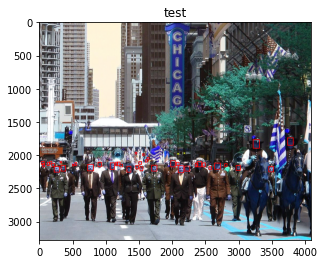

In [48]:
# testing validation image boxes on SR images
from matplotlib import pyplot as plt

# lines = modify_txt("../text","0_Parade_Parade_0_102.txt")
lines = open("../text/0_Parade_Parade_0_102.txt").readlines()
img = cv.imread("../sr_images/esrgan/0_Parade_Parade_0_102.png")
width,hieght,_ = img.shape
# print(img.shape)
for line in lines:
    line = line.split(" ")
    w1 = float(line[1])*hieght
    w2 = float(line[2])*width
    w3 = float(line[3])*hieght
    w4 = float(line[4])*width
    
    x1 = int(w1-(w3/2))
    y1 =int(w2-(w4/2))
    x2= int(w1+(w3/2))
    y2 =int(w2+(w4/2))
#     print([x1,y1,x2,y2])
    img = cv.rectangle(img,(x1,y1),(x2,y2),(255,0,0),10)

plt.imshow(img)
plt.title("test")
plt.show()

### YOLO TEST

In [56]:
# Clone YOLO and setup YOLO
%cd ../
# !git clone https://github.com/ultralytics/yolov3
%pip install -qr yolov3/requirements.txt

/mnt/disks/user/project
Cloning into 'yolov3'...
remote: Enumerating objects: 9862, done.
remote: Total 9862 (delta 0), reused 0 (delta 0), pack-reused 9862
Receiving objects: 100% (9862/9862), 9.19 MiB | 20.07 MiB/s, done.
Resolving deltas: 100% (6666/6666), done.
distutils: /mnt/disks/user/anaconda3/envs/cuda111/include/python3.8/UNKNOWN
sysconfig: /mnt/disks/user/anaconda3/envs/cuda111/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /mnt/disks/user/anaconda3/envs/cuda111/include/python3.8/UNKNOWN
sysconfig: /mnt/disks/user/anaconda3/envs/cuda111/include/python3.8
user = False
home = None
root = None
prefix = None
You should consider upgrading via the '/mnt/disks/user/anaconda3/envs/cuda111/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [57]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla T4)


In [58]:
%cd yolov3
!pip install -r requirements.txt

/mnt/disks/user/project/yolov3
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.6 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 67.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 26.6 MB/s eta 0:00:01
  Using cached Cython-0.29.24-cp38-cp38-manylinux1_x86_64.whl (1.9 MB)
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp38-cp38-linux_x86_64.whl size=419128 sha256=7a80137c9961b10738b21a6cd4f74e16d4e5f2a46e256cd52567e80243cc2197
  Stored in directory: /home/ubuntu/.

distutils: /home/ubuntu/.local/include/python3.8/UNKNOWN
sysconfig: /home/ubuntu/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [59]:
# creating test.txt for testing with Yolo

files = os.listdir("../test_images")
lines_gt = []
lines_sr =[]
for file in files:
    if file.split(".")[1]=="jpg":
        lines_gt.append("./test_images/"+file+"\n")
        lines_sr.append("./sr_images/esrgan/"+file.split(".")[0]+".png\n")
open("../dataset_gt.txt",'w').writelines(lines_gt)
open("../dataset_sr.txt",'w').writelines(lines_sr)

#### Running Untrained YOLO on GT_images

In [64]:
!python test.py  --img 640 --batch 24  --data ../dataset_gt.yml --weights weights/yolov3_untrained/weights/best.pt --name ut_yolo_gt

Namespace(augment=False, batch_size=24, conf_thres=0.001, data='../dataset_gt.yml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='ut_yolo_gt', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['weights/yolov3_untrained/weights/best.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 261 layers, 61497430 parameters, 0 gradients, 154.9 GFLOPS
val: Scanning '../gt_list' images and labels... 656 found, 0 missing, 0 empty, 0val: WARNING: Ignoring corrupted image and/or label ../test_images/21_Festival_Festival_21_604.jpg: duplicate labels
val: Scanning '../gt_list' images and labels... 908 found, 0 missing, 0 empty, 1
val: New cache created: ../gt_list.cache
               Class      Images      Labels           P           R      mAP@.5
                 all         907       13900        0.86       0.682       0.748   

#### Running Trained YOLO on GT_images

In [71]:
!pip install gdown --user
!gdown --id 19yfKQ8L6bSF568hJuXBwI0fmgA1gWBxy -O weights/yolov3_untrained/weights/best.pt

/bin/bash: gdown: command not found


In [72]:
!python test.py  --img 640 --batch 24  --data ../dataset_gt.yml --weights weights/yolov3_trained/weights/best.pt --name t_yolo_gt

Namespace(augment=False, batch_size=24, conf_thres=0.001, data='../dataset_gt.yml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='t_yolo_gt', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['weights/yolov3_trained/weights/best.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 261 layers, 61497430 parameters, 0 gradients, 154.9 GFLOPS
val: Scanning '../gt_list.cache' images and labels... 908 found, 0 missing, 0 em
               Class      Images      Labels           P           R      mAP@.5
                 all         907       13900       0.899       0.744       0.805       0.434
Speed: 10.1/1.1/11.3 ms inference/NMS/total per 640x640 image at batch-size 24
Results saved to runs/test/t_yolo_gt


#### Running untrained Yolo on esrgan images

In [65]:
!python test.py  --img 640 --batch 24  --data ../dataset_sr.yml --weights weights/yolov3_untrained/weights/best.pt --name ut_yolo_esrgan

Namespace(augment=False, batch_size=24, conf_thres=0.001, data='../dataset_sr.yml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='ut_yolo_esrgan', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['weights/yolov3_untrained/weights/best.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 261 layers, 61497430 parameters, 0 gradients, 154.9 GFLOPS
val: Scanning '../sr_list' images and labels... 698 found, 0 missing, 0 empty, 0val: WARNING: Ignoring corrupted image and/or label ../sr_images/esrgan/21_Festival_Festival_21_604.png: duplicate labels
val: Scanning '../sr_list' images and labels... 908 found, 0 missing, 0 empty, 1
val: New cache created: ../sr_list.cache
               Class      Images      Labels           P           R      mAP@.5
                 all         907       13900       0.853       0.682      

#### Running trained yolo on esrgan images

In [73]:
!python test.py  --img 640 --batch 24  --data ../dataset_sr.yml --weights weights/yolov3_trained/weights/best.pt --name t_yolo_esrgan

Namespace(augment=False, batch_size=24, conf_thres=0.001, data='../dataset_sr.yml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='t_yolo_esrgan', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['weights/yolov3_trained/weights/best.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 261 layers, 61497430 parameters, 0 gradients, 154.9 GFLOPS
val: Scanning '../sr_list.cache' images and labels... 908 found, 0 missing, 0 em
               Class      Images      Labels           P           R      mAP@.5
                 all         907       13900       0.893       0.747       0.804       0.432
Speed: 11.1/1.3/12.4 ms inference/NMS/total per 640x640 image at batch-size 24
Results saved to runs/test/t_yolo_esrgan
